In [1]:
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score as ROC
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import accuracy_score as ACC
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score as BACC
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.neighbors import KNeighborsClassifier as knnc
from sklearn.svm import SVC as svc
from sklearn.linear_model import LinearRegression as LR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import sys
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor as xgbr
from xgboost import XGBClassifier as xgbc
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR

sys.path.append('D:/codeHS/')
from codeHS.ML import MLfunction2



c:\Users\wxzr1\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
massData = pd.read_csv('D:/Desktop/中草药图谱/PDFread/TCMEIMSTOXData.csv', index_col=0).iloc[:,3:].values
print(massData.shape)
MZ_index = np.concatenate([np.arange(12001), -np.arange(12001)])[massData.sum(axis=0)!=0]
massData = massData[:,massData.sum(axis=0)!=0]
print(massData.shape)
labelTox = pd.read_csv('D:/Desktop/中草药图谱/PDFread/TCMEIMSTOXData.csv', index_col=0).iloc[:,2].tolist()
original_data = pd.read_csv('D:/Desktop/中草药图谱/PDFread/TCMEIMSTOXData.csv', index_col=0)


(101, 24002)
(101, 20429)


In [4]:
original_index = original_data.index
np.random.seed(1)
new_index = np.where(np.array(labelTox)==1)[0].tolist()
new_index += np.where(np.array(labelTox)==2)[0].tolist()
new_index += np.random.choice(np.where(np.array(labelTox)==0)[0], 44, replace=False).tolist()
np.random.seed(None)
filtered_index = np.array(original_index)[new_index]
x = StandardScaler().fit_transform(massData[new_index])
# y = np.array(labelTox)[new_index].astype(np.int32)
y = 1-(np.array(labelTox)[new_index].astype(np.int32)==0)
y, np.array(labelTox)[new_index].astype(np.int32)

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [7]:
np.random.seed(1)
new_index = np.where(np.array(labelTox)==1)[0].tolist()
new_index += np.where(np.array(labelTox)==2)[0].tolist()
new_index += np.random.choice(np.where(np.array(labelTox)==0)[0], 44, replace=False).tolist()
np.random.seed(None)
filtered_index = np.array(original_index)[new_index]
x = StandardScaler().fit_transform(massData[new_index])
y = 1 - (np.array(labelTox)[new_index].astype(np.int32) == 0)

pca = PCA(n_components=3)
x_pca = pca.fit_transform(x)
mask = np.any(np.abs(x_pca) > 40, axis=1)
x_pca_filtered = x_pca[~mask]
y_filtered = y[~mask]
filtered_index_filtered = filtered_index[~mask]
pc2_values = x_pca_filtered[:, 1]
y_filtered_indices = np.where(y_filtered == 0)[0]
top2_indices = y_filtered_indices[np.argsort(np.abs(pc2_values[y_filtered_indices]))[-2:]]
x_final = np.delete(x_pca_filtered, top2_indices, axis=0)
y_final = np.delete(y_filtered, top2_indices, axis=0)
filtered_index_final = np.delete(filtered_index_filtered, top2_indices, axis=0)


final_data_df = pd.DataFrame(x_final)
final_data_df['Label'] = y_final
final_data_df['Index'] = filtered_index_final

#  CSV 
#final_data_df.to_csv('filtered_final_data.csv', index=False)
x = StandardScaler().fit_transform(massData[filtered_index_final])
y = y_final

In [53]:
scores = []
# logP new 161
for i in list(range(0,1000)):
    results = MLfunction2.cross_val(rfc(random_state=i), x, y, random_seed=i, scoresFun=[BACC, ACC], cv=5)
    scores.append(results.scores.mean()[0])
    if results.scores.std()[1]<0.1 and results.scores.mean()[1]>0.66:
        print(results.pred_all)
        display(i, results.scores.mean(), results.scores.std(), '*'*50)


[0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0.]


8

balanced_accuracy_score    0.675794
accuracy_score             0.662500
dtype: float64

balanced_accuracy_score    0.084734
accuracy_score             0.094786
dtype: float64

'**************************************************'

[0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 1. 0.]


270

balanced_accuracy_score    0.694643
accuracy_score             0.675000
dtype: float64

balanced_accuracy_score    0.053500
accuracy_score             0.052291
dtype: float64

'**************************************************'

[0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1.
 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0.]


377

balanced_accuracy_score    0.663452
accuracy_score             0.662500
dtype: float64

balanced_accuracy_score    0.072062
accuracy_score             0.071261
dtype: float64

'**************************************************'

[0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1.
 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 1. 1. 0.]


665

balanced_accuracy_score    0.7000
accuracy_score             0.6625
dtype: float64

balanced_accuracy_score    0.083060
accuracy_score             0.071261
dtype: float64

'**************************************************'

[0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 1. 1.]


670

balanced_accuracy_score    0.674087
accuracy_score             0.662500
dtype: float64

balanced_accuracy_score    0.083761
accuracy_score             0.083853
dtype: float64

'**************************************************'

[1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 0.]


794

balanced_accuracy_score    0.737698
accuracy_score             0.737500
dtype: float64

balanced_accuracy_score    0.089486
accuracy_score             0.081490
dtype: float64

'**************************************************'

[1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1.
 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 1. 0.]


981

balanced_accuracy_score    0.689087
accuracy_score             0.687500
dtype: float64

balanced_accuracy_score    0.078579
accuracy_score             0.076547
dtype: float64

'**************************************************'

Scores Begin:
accuracy_score             0.737500
balanced_accuracy_score    0.737698
dtype: float64
1. Optimaze Parma: random_state  range:range(0, 300)
Original Model RandomForestClassifier(random_state=794)


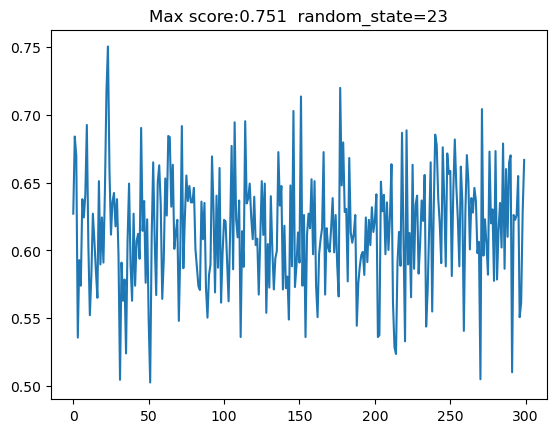

Optimazed Model RandomForestClassifier(random_state=23)
Best Scores:
accuracy_score             0.750000
balanced_accuracy_score    0.750595
dtype: float64
2. Optimaze Parma: n_estimators  range:range(1, 200)
Original Model RandomForestClassifier(random_state=23)


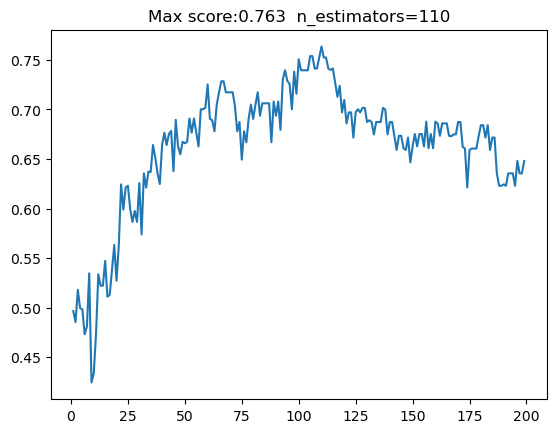

Optimazed Model RandomForestClassifier(n_estimators=110, random_state=23)
Best Scores:
accuracy_score             0.762500
balanced_accuracy_score    0.763492
dtype: float64
3. Optimaze Parma: max_depth  range:range(1, 100)
Original Model RandomForestClassifier(n_estimators=110, random_state=23)


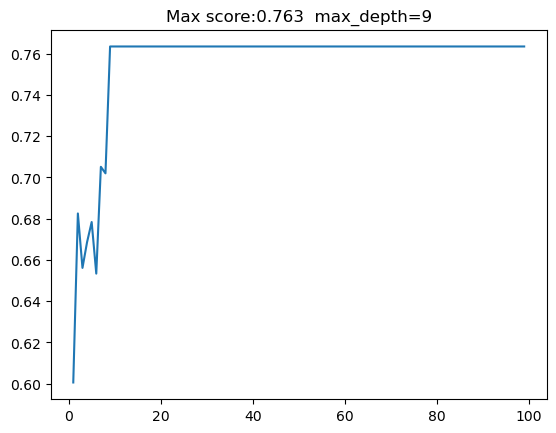

Optimazed Model RandomForestClassifier(max_depth=9, n_estimators=110, random_state=23)
Best Scores:
accuracy_score             0.762500
balanced_accuracy_score    0.763492
dtype: float64
4. Optimaze Parma: min_impurity_decrease  range:[0.         0.02631579 0.05263158 0.07894737 0.10526316 0.13157895
 0.15789474 0.18421053 0.21052632 0.23684211 0.26315789 0.28947368
 0.31578947 0.34210526 0.36842105 0.39473684 0.42105263 0.44736842
 0.47368421 0.5       ]
Original Model RandomForestClassifier(max_depth=9, n_estimators=110, random_state=23)


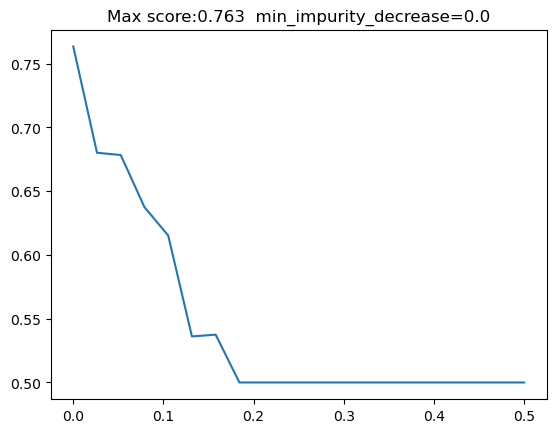

Optimazed Model RandomForestClassifier(max_depth=9, n_estimators=110, random_state=23)
Best Scores:
accuracy_score             0.762500
balanced_accuracy_score    0.763492
dtype: float64
5. Optimaze Parma: max_samples  range:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, None]
Original Model RandomForestClassifier(max_depth=9, n_estimators=110, random_state=23)


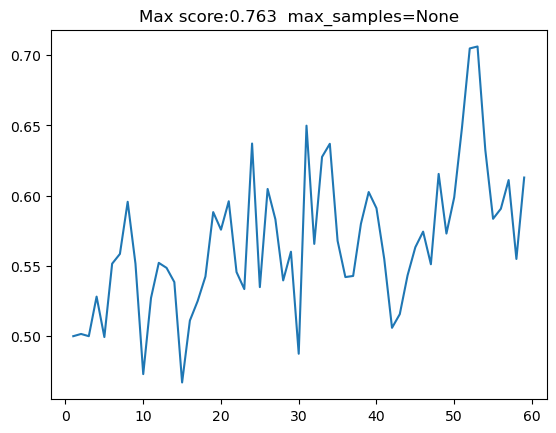

Optimazed Model RandomForestClassifier(max_depth=9, n_estimators=110, random_state=23)
Best Scores:
accuracy_score             0.762500
balanced_accuracy_score    0.763492
dtype: float64
                           Before     After
accuracy_score           0.737500  0.762500
balanced_accuracy_score  0.737698  0.763492
Best Model for test: RandomForestClassifier(max_depth=9, n_estimators=110, random_state=23)


In [177]:
# 2 class
parmas = {'random_state':range(300), 
          'n_estimators':range(1,200), 
          'max_depth':range(1,100), 
        #   'max_features':range(int(x.shape[1]**0.5),x.shape[1]), 
          'min_impurity_decrease':np.linspace(0,0.5,20), 
          'max_samples':list(range(1,60))+[None]
          }

# parmas = {'max_samples':range(1,int(des_train.shape[0]/cv)*cv+des_train.shape[0]%cv-1)}
# neg_mean_squared_error
parma_youhua = MLfunction2.parmaOptimaze(rfc(random_state=794), [x, y], parmas, random_seed=794, cv=5, scoresFun=[BACC, ACC, F1])

In [57]:
results = MLfunction2.cross_val(rfc(max_depth=9, n_estimators=110, random_state=23), x, y, random_seed=794, scoresFun=[BACC, ACC, F1], cv=5)
# 打印每一折的评分
print("Cross Validation Scores:")
print(results.scores)

# 打印平均评分
print("\nAverage Scores:")
print(results.scores.mean())

Cross Validation Scores:
   balanced_accuracy_score  accuracy_score  f1_score
0                 0.750000          0.7500  0.714286
1                 0.562500          0.5625  0.588235
2                 0.944444          0.9375  0.933333
3                 0.687500          0.6875  0.615385
4                 0.873016          0.8750  0.888889

Average Scores:
balanced_accuracy_score    0.763492
accuracy_score             0.762500
f1_score                   0.748026
dtype: float64


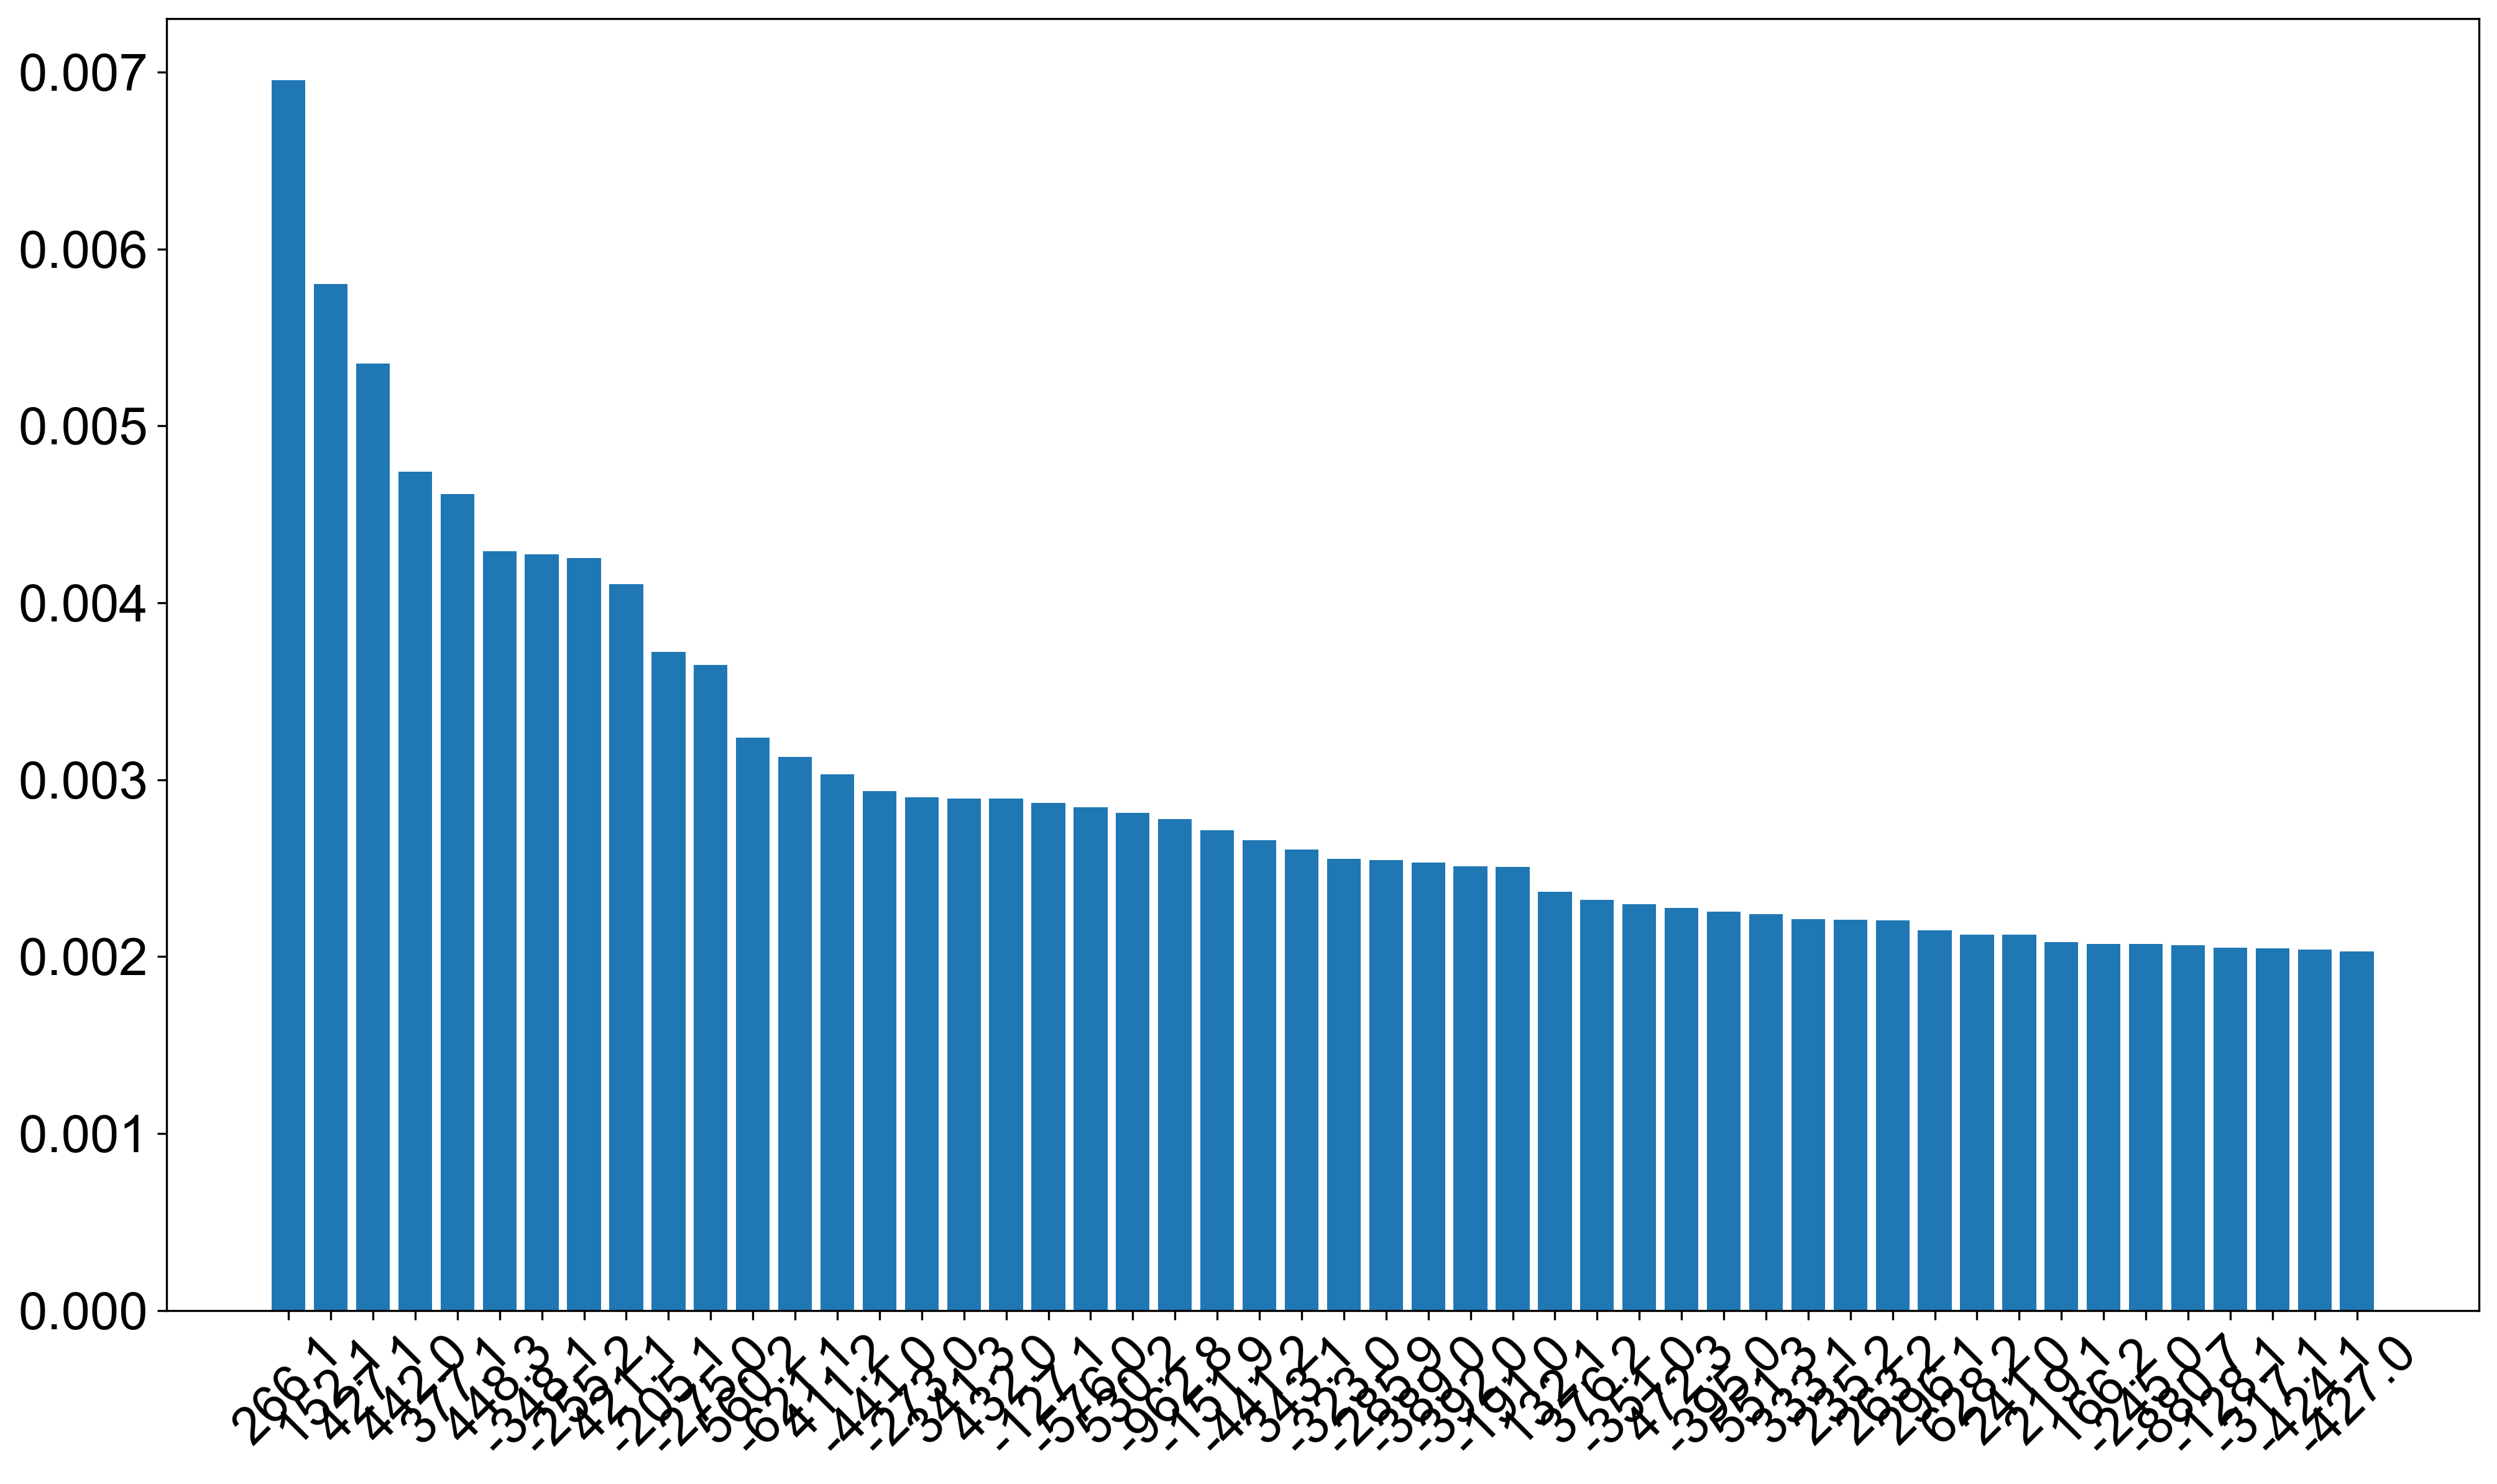

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier as rfc

model_trained = rfc(max_depth=9, n_estimators=110, random_state=23).fit(x, y)

feature_importances = model_trained.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
top_xxx = 50  


top_features = MZ_index[sorted_indices][:top_xxx]
top_importances = feature_importances[sorted_indices][:top_xxx]
importance_df = pd.DataFrame({'Feature': top_features, 'Importance': top_importances})
importance_df.to_csv('feature_importance.csv', index=False)

# 绘图
plt.figure(figsize=[16, 9], dpi=300)
plt.bar(range(top_xxx), top_importances)
plt.xticks(range(top_xxx), top_features / 10, fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.show()


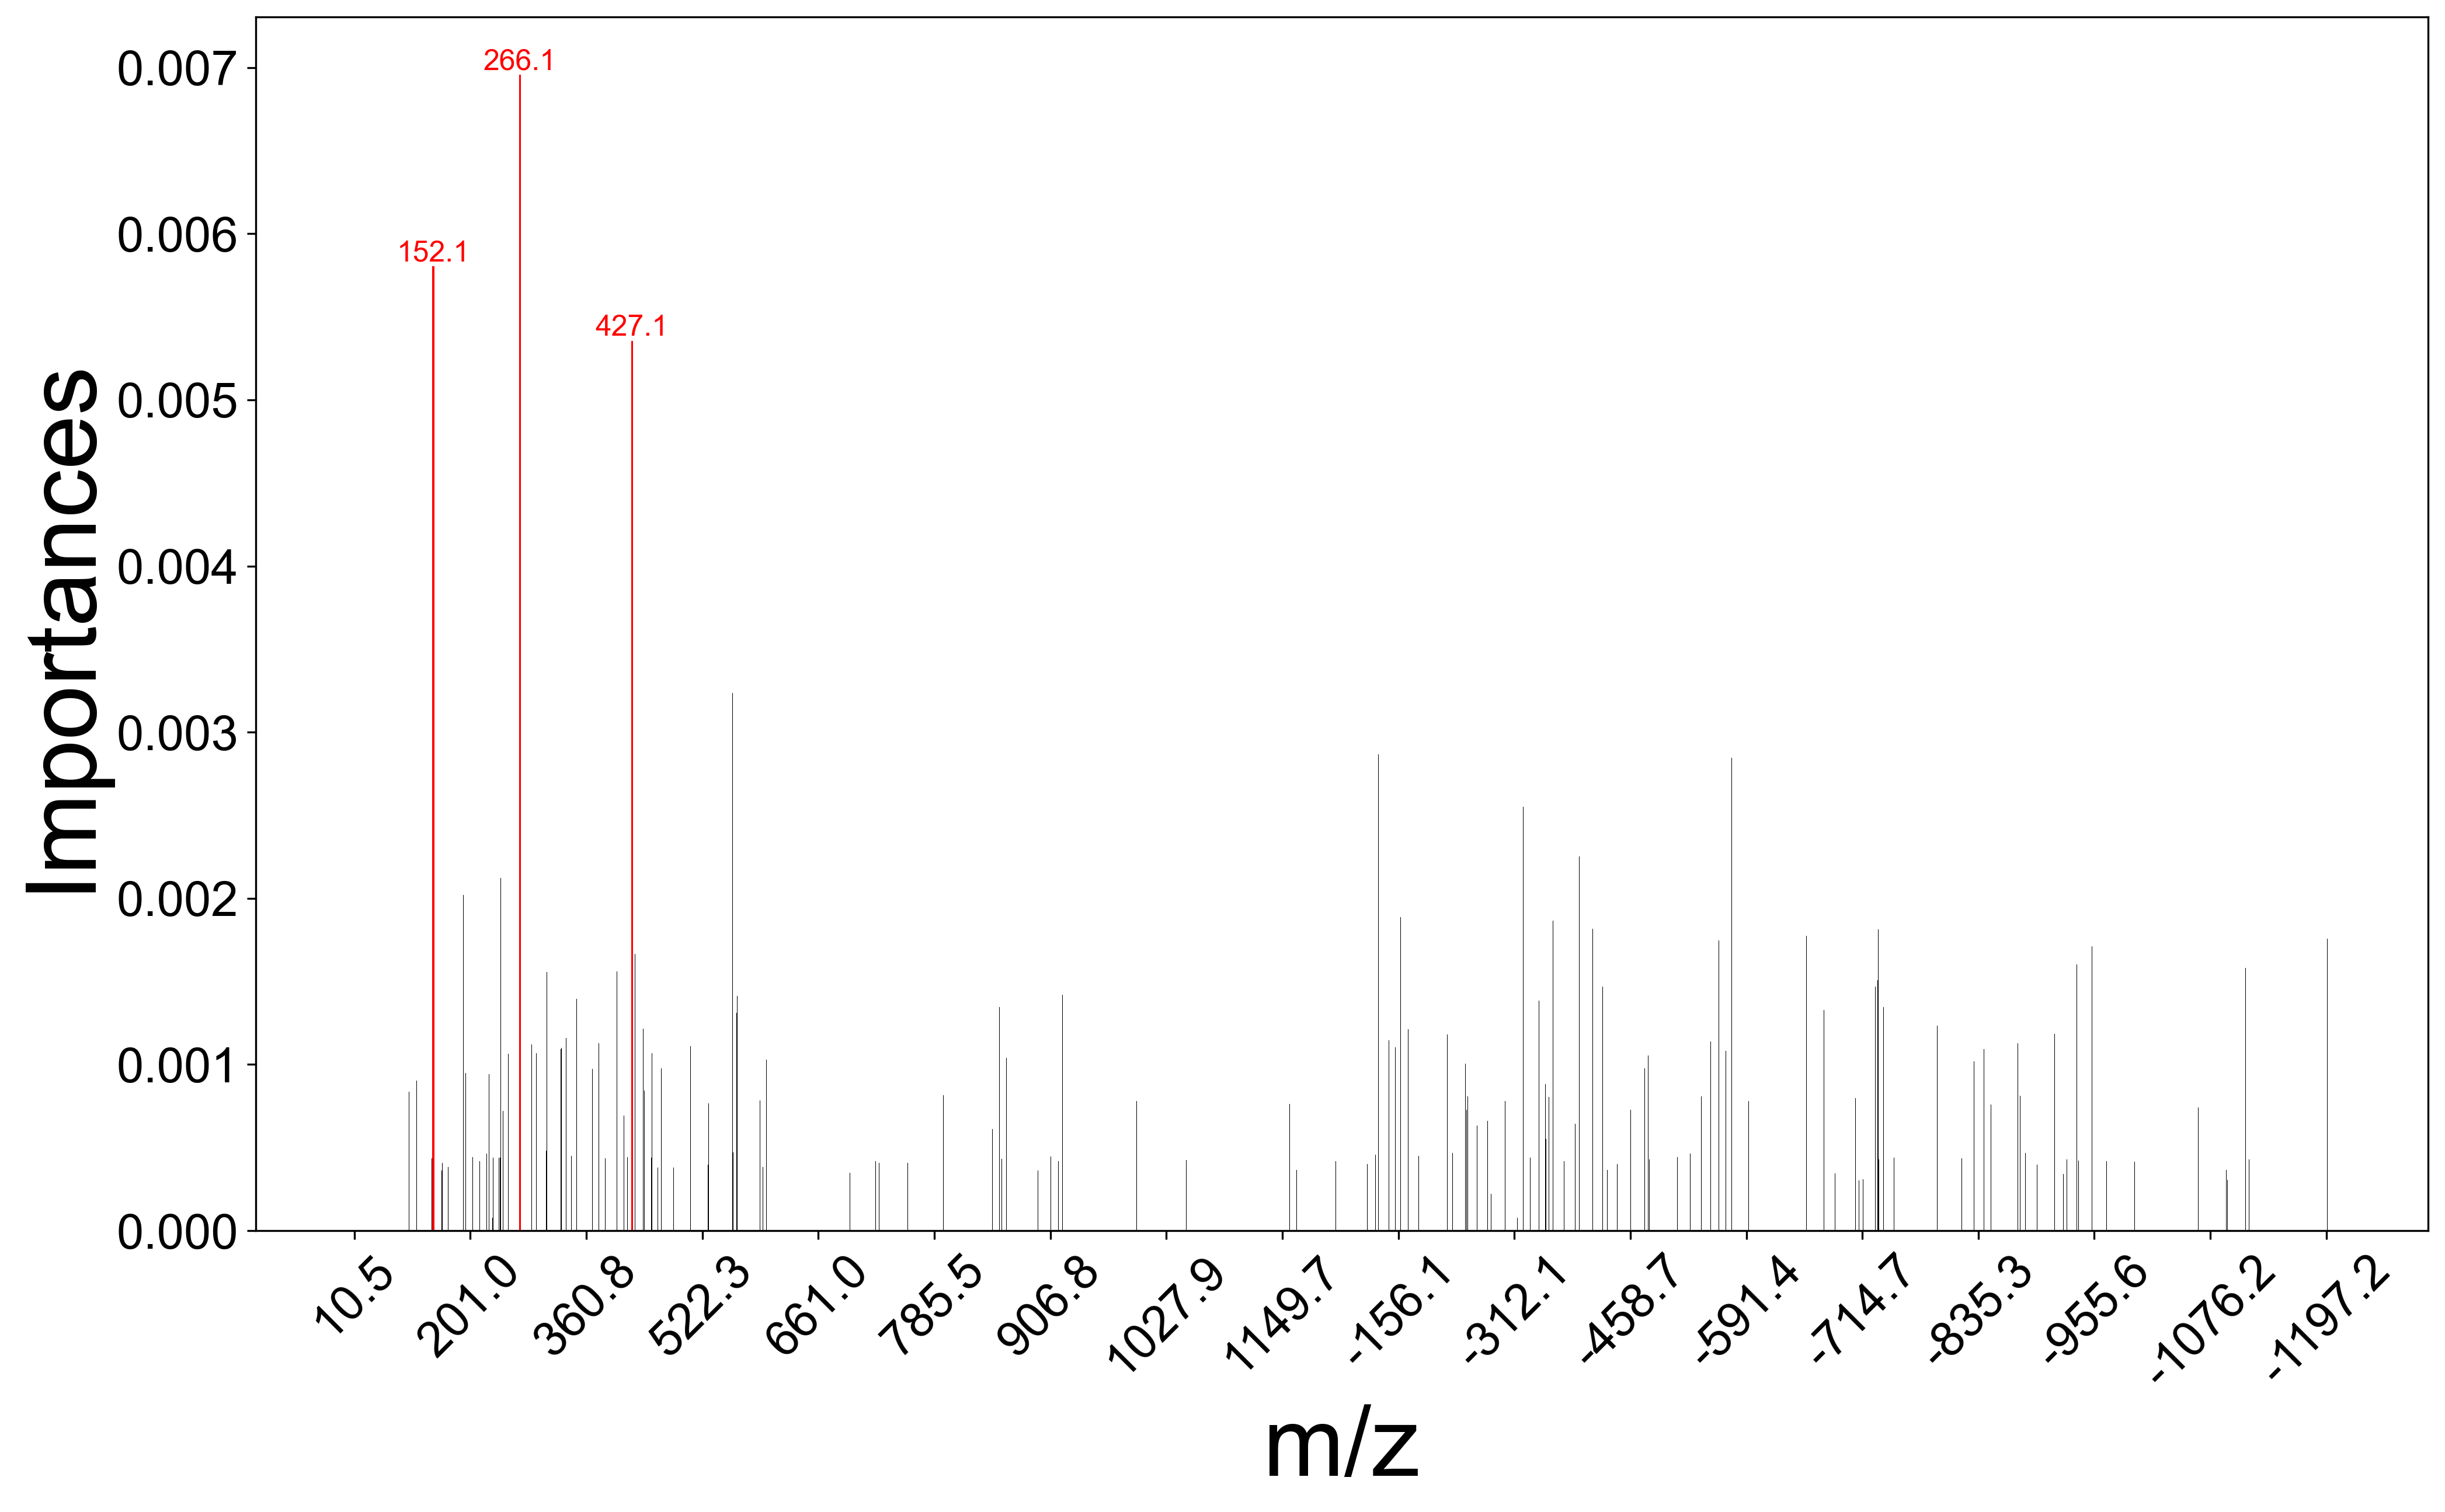

In [21]:
model_trained = rfc(max_depth=9, n_estimators=110, random_state=23).fit(x, y)
importances = model_trained.feature_importances_


plt.rcParams['font.family'] = 'Arial'
plt.figure(figsize=[16, 9], dpi=300)
plt.bar(range(len(importances)), importances, color='black')

top_features = np.argsort(importances)[-3:]

for idx in top_features:
    plt.bar(idx, importances[idx], color='red', width=20)

    plt.text(idx, importances[idx], f'{MZ_index[idx]/10:.1f}', ha='center', va='bottom', color='red', fontsize=12)

plt.xticks(np.arange(0, len(importances), step=1200), labels=np.round(MZ_index[::1200]/10, 1), rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('m/z', fontsize=40)
plt.ylabel('Importances', fontsize=40)
plt.savefig('D:/Desktop/中草药图谱/特征重要性.png', dpi=800, bbox_inches='tight')

# 显示图形
plt.show()


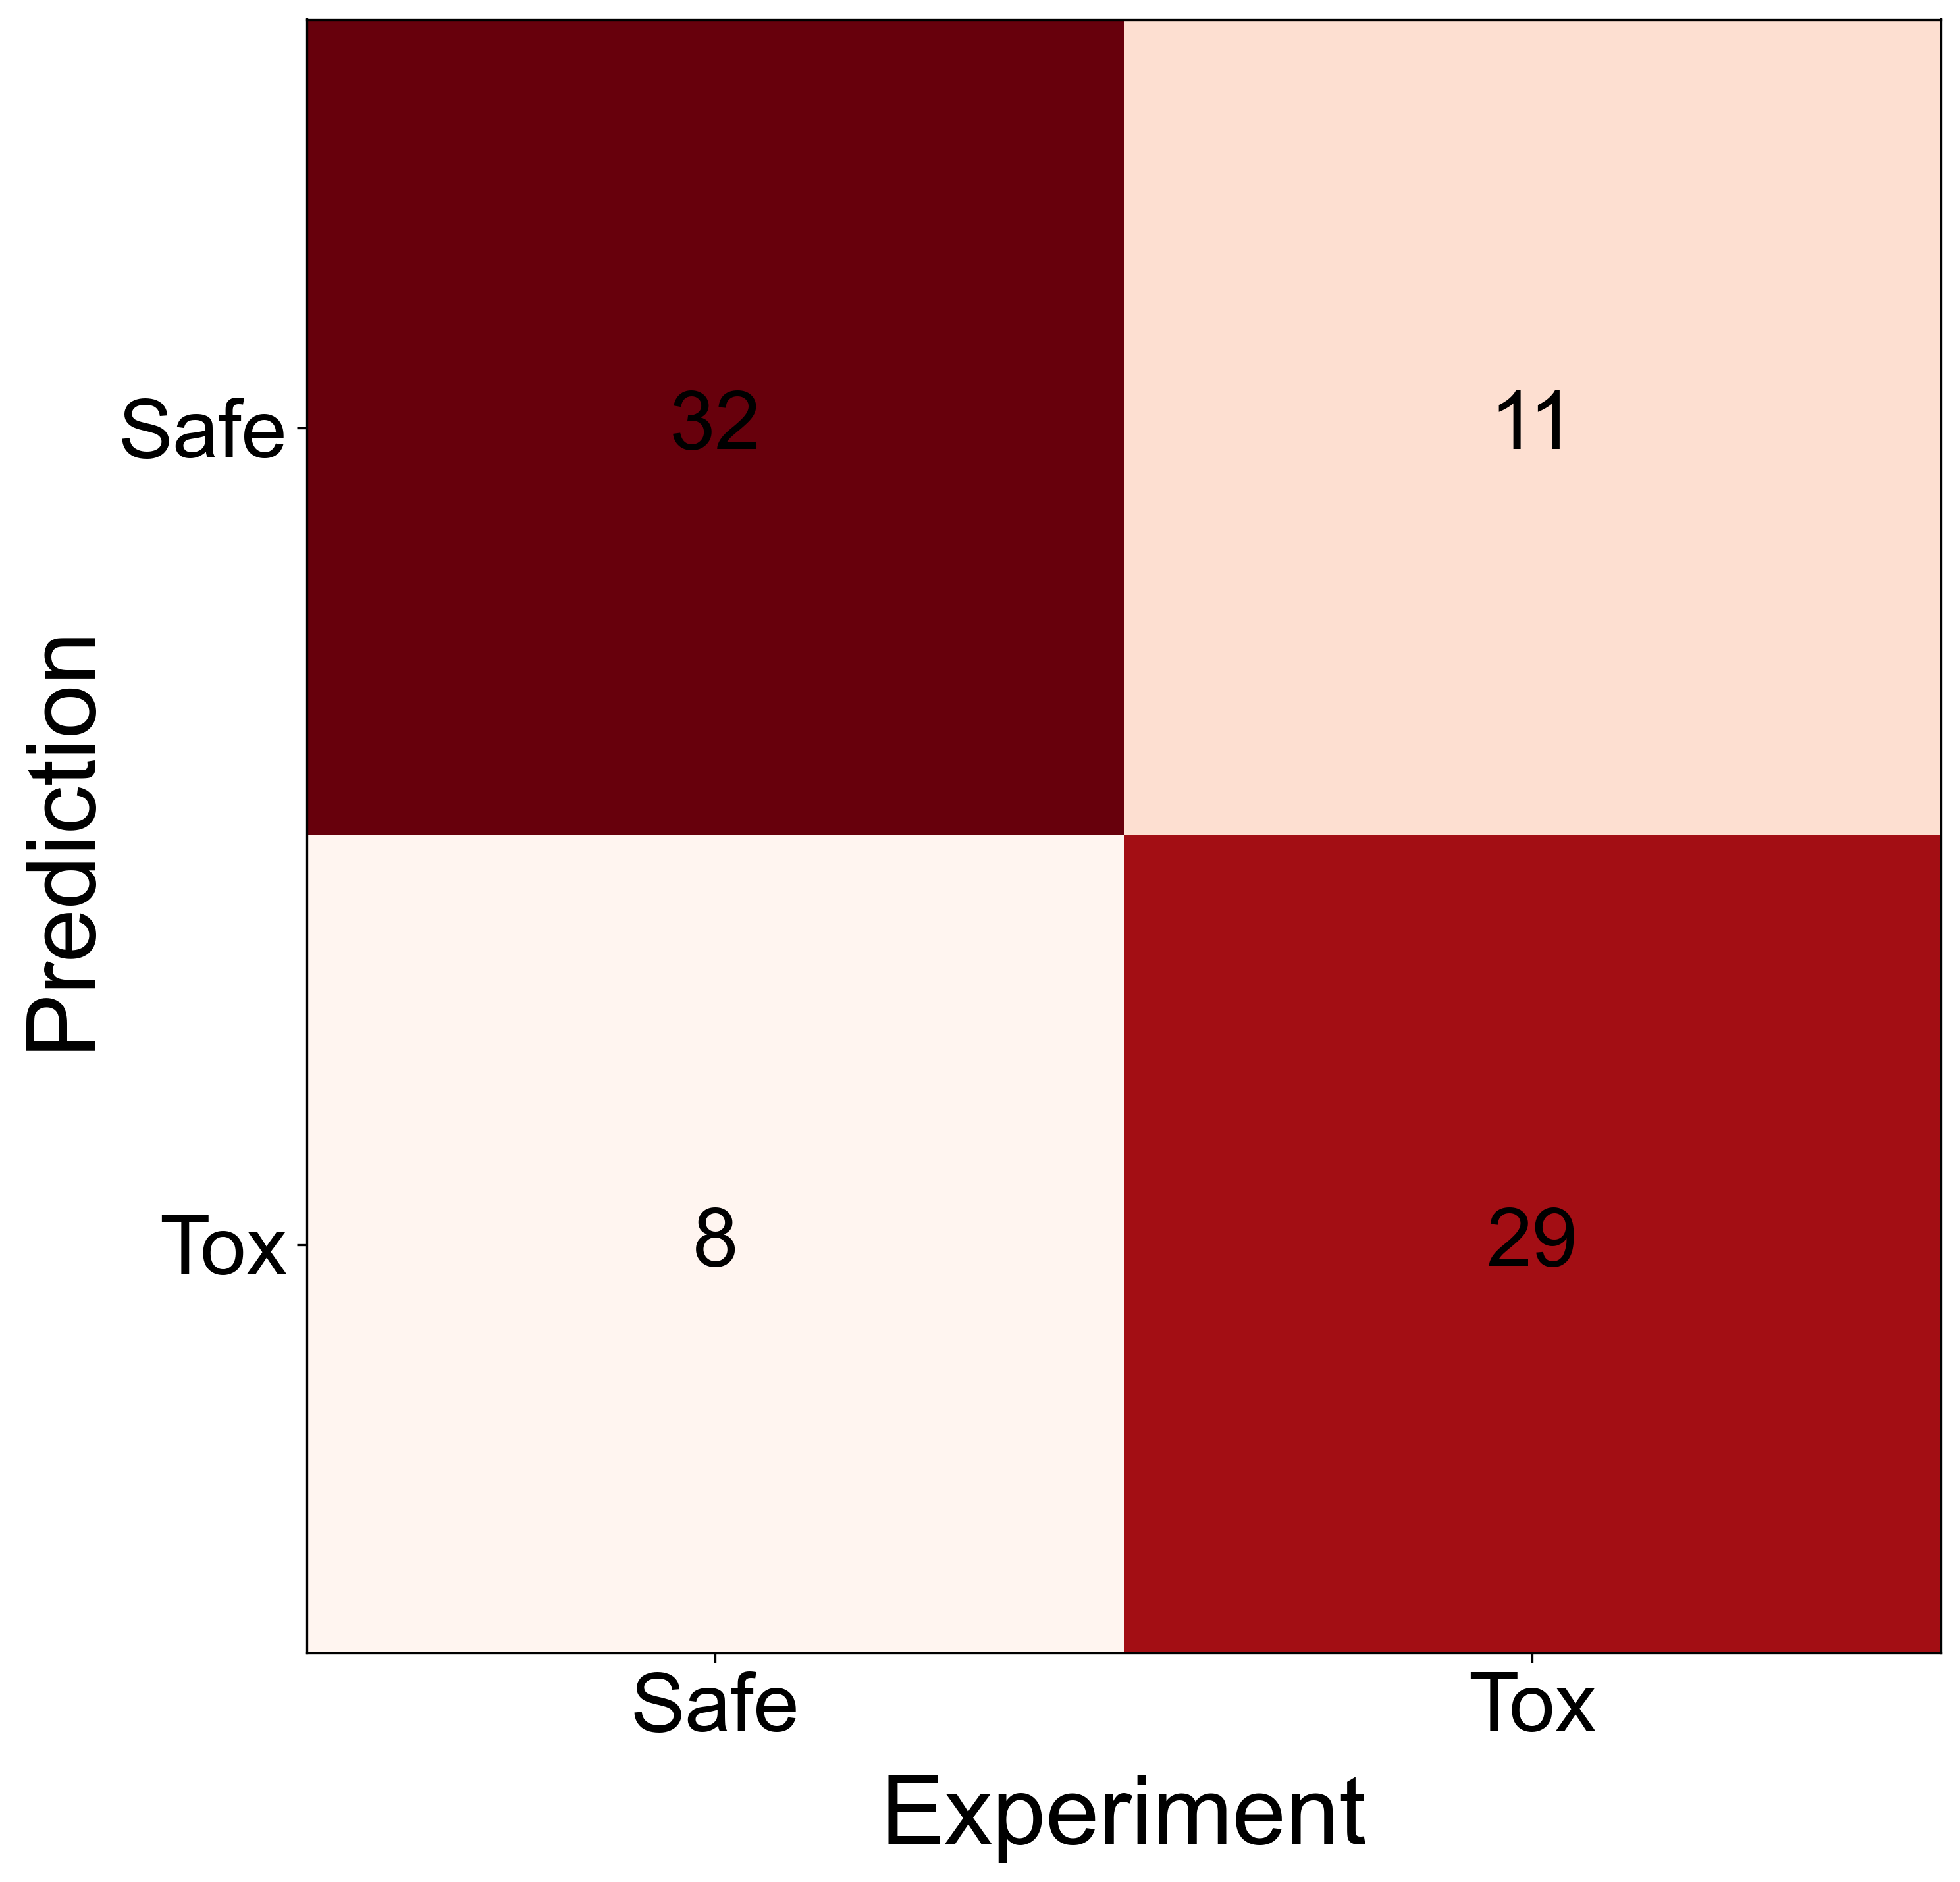

ACC-kf = 0.762
BACC-kf = 0.762
F1 Score-kf = 0.762


In [51]:
def result_figure_classifier(y_kf=[], y_test=[], yLabels=None, labels=['Experiment', 'Prediction'],
                             cmap=plt.cm.Reds, name='Confusion Matrix', path='./'):
    # 设置字体为 Arial
    plt.rcParams['font.family'] = "Arial"
    plt.figure(figsize=[10, 10], dpi=300)
    
    # 创建存储文件的文件夹
    os.makedirs(f'{path}/csv/', exist_ok=True)
    os.makedirs(f'{path}/figure/', exist_ok=True)
    
    if len(y_kf) == 2:
        kfTrue = y_kf[0]
        kfPred = y_kf[1]
        acc_train = ACC(kfTrue, kfPred)
        bacc_train = BACC(kfTrue, kfPred)
        f1_train = f1_score(kfTrue, kfPred, average='weighted')

        trainPD = pd.DataFrame(columns=['True', 'Prediction', 'ACC', 'BACC', 'F1 Score'])
        trainPD['True'] = y_kf[0]
        trainPD['Prediction'] = y_kf[1]
        trainPD.loc[0, ['ACC', 'BACC', 'F1 Score']] = [acc_train, bacc_train, f1_train]
        trainPD.to_csv(f'{path}/csv/{name}_kf.csv', index=None)

    if len(y_test) == 2:
        testTrue = y_test[0]
        testPred = y_test[1]
        acc_test = ACC(testTrue, testPred)
        bacc_test = BACC(testTrue, testPred)
        f1_test = f1_score(testTrue, testPred, average='weighted')

        testPD = pd.DataFrame(columns=['True', 'Prediction', 'ACC', 'BACC', 'F1 Score'])
        testPD['True'] = y_test[0]
        testPD['Prediction'] = y_test[1]
        testPD.loc[0, ['ACC', 'BACC', 'F1 Score']] = [acc_test, bacc_test, f1_test]
        testPD.to_csv(f'{path}/csv/{name}_test.csv', index=None)

    if len(y_kf) + len(y_test) == 4:
        trueALL = np.concatenate([y_kf[0], y_test[0]])
        predALL = np.concatenate([y_kf[1], y_test[1]])

        C = confusion_matrix(trueALL, predALL, labels=range(len(yLabels))).T
        C_kf = confusion_matrix(y_kf[0], y_kf[1], labels=range(len(yLabels))).T
        C_test = confusion_matrix(y_test[0], y_test[1], labels=range(len(yLabels))).T
        plt.matshow(C, cmap=cmap, fignum=0)

        for i in range(len(C)):
            for j in range(len(C)):
                plt.annotate(f'K-fold = {C_kf[j, i]}\nTest = {C_test[j, i]}', xy=(i, j),
                             horizontalalignment='center', verticalalignment='center', fontsize=30)  # 修改字体大小为30
    else:
        if len(y_kf) == 2:
            trueALL = y_kf[0]
            predALL = y_kf[1]
        elif len(y_test) == 2:
            trueALL = y_test[0]
            predALL = y_test[1]
        C = confusion_matrix(trueALL, predALL, labels=range(len(yLabels))).T
        plt.matshow(C, cmap=cmap, fignum=0)

        for i in range(len(C)):
            for j in range(len(C)):
                plt.annotate(C[j, i], xy=(i, j), horizontalalignment='center', verticalalignment='center',
                             fontsize=30)  # 修改字体大小为30

    plt.tick_params(labelsize=30, bottom=True, top=False, labelbottom=True, labeltop=False)
    plt.xlabel(labels[0], fontsize=35, labelpad=10)
    plt.ylabel(labels[1], fontsize=35)
    plt.xticks(range(len(yLabels)), yLabels)
    plt.yticks(range(len(yLabels)), yLabels)
    plt.tight_layout()
    
    # 保存为800 DPI的TIFF文件
    plt.savefig(f'{path}/figure/{name}.tif', dpi=800, bbox_inches='tight')
    plt.show()

    if len(y_kf) + len(y_test) == 4:
        print("ACC-kf = {:.3f}       ACC-test = {:.3f}".format(acc_train, acc_test))
        print("BACC-kf = {:.3f}      BACC-test = {:.3f}".format(bacc_train, bacc_test))
        print("F1 Score-kf = {:.3f}  F1 Score-test = {:.3f}".format(f1_train, f1_test))
    elif len(y_kf) == 2:
        print("ACC-kf = {:.3f}".format(acc_train))
        print("BACC-kf = {:.3f}".format(bacc_train))
        print("F1 Score-kf = {:.3f}".format(f1_train))
    elif len(y_test) == 2:
        print("ACC-test = {:.3f}".format(acc_test))
        print("BACC-test = {:.3f}".format(bacc_test))
        print("F1 Score-test = {:.3f}".format(f1_test))


result_figure_classifier(y_kf=[y, results.pred_all], yLabels=['Safe', 'Tox'], name='Confusion Matrix', path='./')



c:\Users\wxzr1\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Scores Begin:
accuracy_score             0.612500
balanced_accuracy_score    0.606944
dtype: float64
1. Optimaze Parma: n_estimators  range:range(1, 200)
Original Model XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


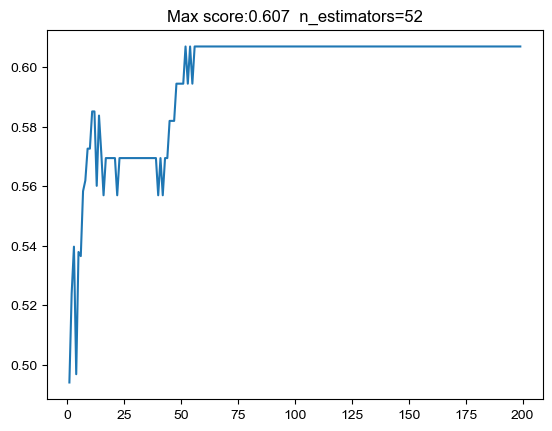

Optimazed Model XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=52, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Best Scores:
accuracy_score             0.612500
balanced_accuracy_score    0.606944
dtype: float64
2. Optimaze Parma: learning_rate  range:[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0

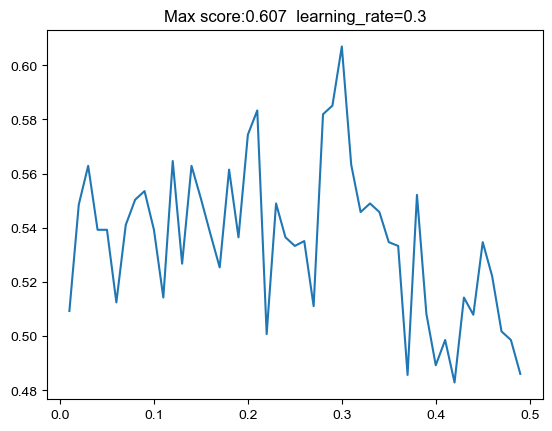

Optimazed Model XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=52, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Best Scores:
accuracy_score             0.612500
balanced_accuracy_score    0.606944
dtype: float64
3. Optimaze Parma: max_depth  range:range(1, 1000)
Original Model XGBClassifier(base_score=None, booster=None, callbacks=None,
       

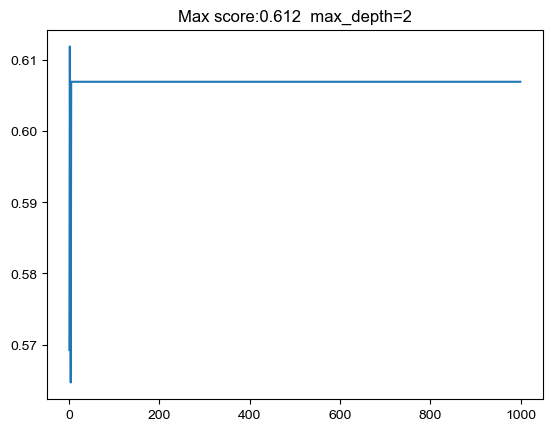

Optimazed Model XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=52, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Best Scores:
accuracy_score             0.612500
balanced_accuracy_score    0.611905
dtype: float64
4. Optimaze Parma: gamma  range:[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]
Original Model XGBClassifier(base_score=None, booster=None, cal

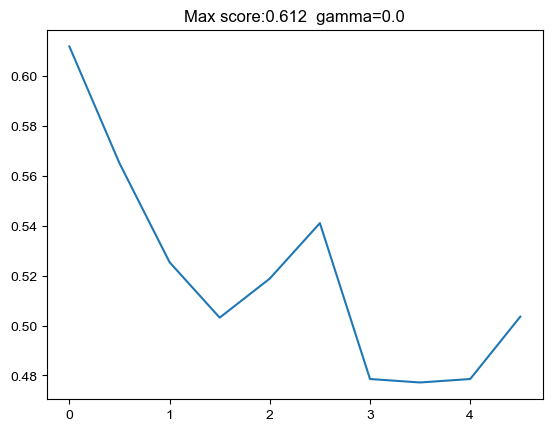

Optimazed Model XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=52, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Best Scores:
accuracy_score             0.612500
balanced_accuracy_score    0.611905
dtype: float64
5. Optimaze Parma: reg_alpha  range:[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 

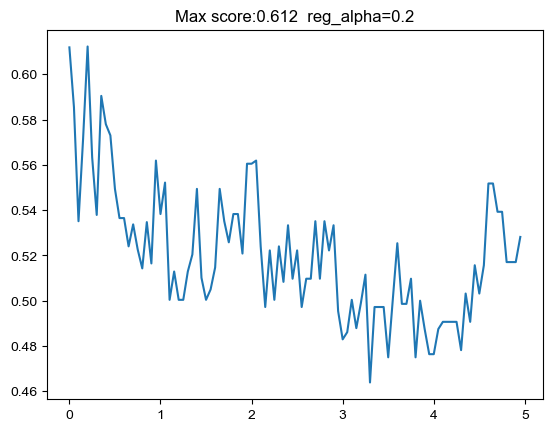

Optimazed Model XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=52, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Best Scores:
accuracy_score             0.612500
balanced_accuracy_score    0.612302
dtype: float64
6. Optimaze Parma: reg_lambda  range:[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95

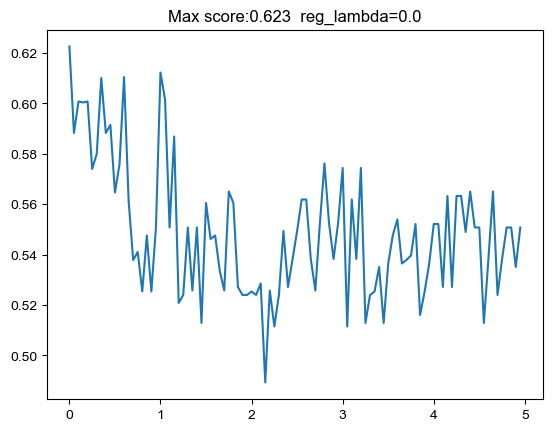

Optimazed Model XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=52, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Best Scores:
accuracy_score             0.625000
balanced_accuracy_score    0.622619
dtype: float64
                           Before     After
accuracy_score           0.612500  0.625000
balanced_accuracy_score  0.606944  0.622619
Best M

In [28]:
# XGB
# 2 class

parmas = {'n_estimators':range(1,200),
          'learning_rate':np.arange(0.01,0.5,0.01),
          'max_depth':range(1,1000), 
        #   'max_features':range(int(x.shape[1]**0.5),x.shape[1]), 
          'gamma':np.arange(0,5,0.5), 
          'reg_alpha':np.arange(0,5,0.05),
          'reg_lambda':np.arange(0,5,0.05),
          # 'max_samples':list(range(1,60))+[None],
          }

# parmas = {'max_samples':range(1,int(des_train.shape[0]/cv)*cv+des_train.shape[0]%cv-1)}
# neg_mean_squared_error
parma_youhua = MLfunction2.parmaOptimaze(xgbc(use_label_encoder=False, objective="binary:logistic"), [x, y], parmas, random_seed=794, cv=5, scoresFun=[BACC, ACC])

In [40]:
scores = []
# logP new 161
for i in list(range(0,1000)):
    results = MLfunction2.cross_val(xgbc(random_state=i), x, y, random_seed=i, scoresFun=[BACC, ACC], cv=5)
    scores.append(results.scores.mean()[0])
    if results.scores.std()[1]<0.1 and results.scores.mean()[1]>0.66:
        print(results.pred_all)
        display(i, results.scores.mean(), results.scores.std(), '*'*50)

[1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1.
 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1.]


178

BACC    0.67118
ACC     0.66250
dtype: float64

BACC    0.075767
ACC     0.071261
dtype: float64

'**************************************************'

[1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0.]


893

BACC    0.713939
ACC     0.687500
dtype: float64

BACC    0.043905
ACC     0.062500
dtype: float64

'**************************************************'

[0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 1. 0. 0. 0.]


995

BACC    0.674405
ACC     0.662500
dtype: float64

BACC    0.063926
ACC     0.055902
dtype: float64

'**************************************************'

c:\Users\wxzr1\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Scores Begin:
accuracy_score             0.687500
balanced_accuracy_score    0.713939
dtype: float64
1. Optimaze Parma: n_estimators  range:range(1, 200)
Original Model XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


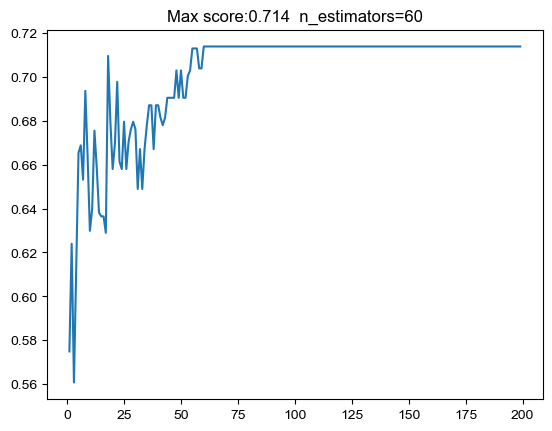

Optimazed Model XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=60, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Best Scores:
accuracy_score             0.687500
balanced_accuracy_score    0.713939
dtype: float64
2. Optimaze Parma: learning_rate  range:[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0

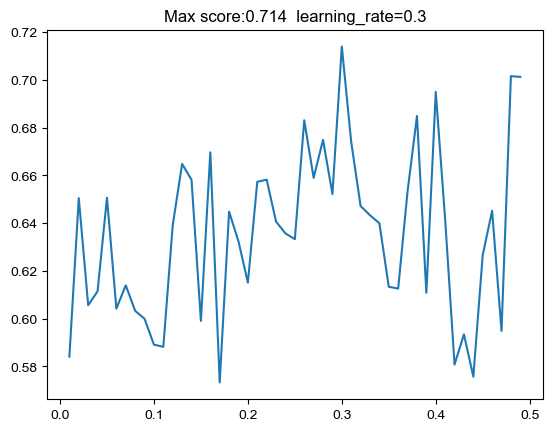

Optimazed Model XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=60, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Best Scores:
accuracy_score             0.687500
balanced_accuracy_score    0.713939
dtype: float64
3. Optimaze Parma: max_depth  range:range(1, 1000)
Original Model XGBClassifier(base_score=None, booster=None, callbacks=None,
       

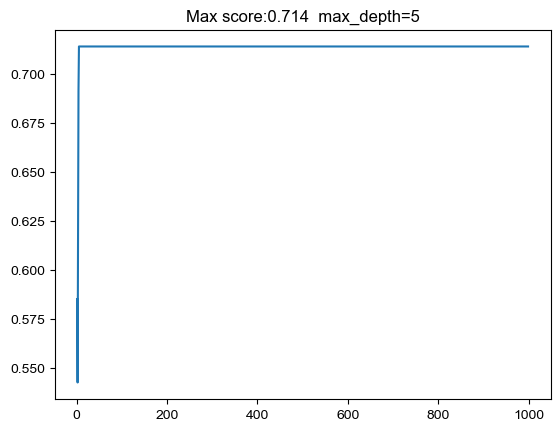

Optimazed Model XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=60, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Best Scores:
accuracy_score             0.687500
balanced_accuracy_score    0.713939
dtype: float64
4. Optimaze Parma: gamma  range:[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]
Original Model XGBClassifier(base_score=None, booster=None, cal

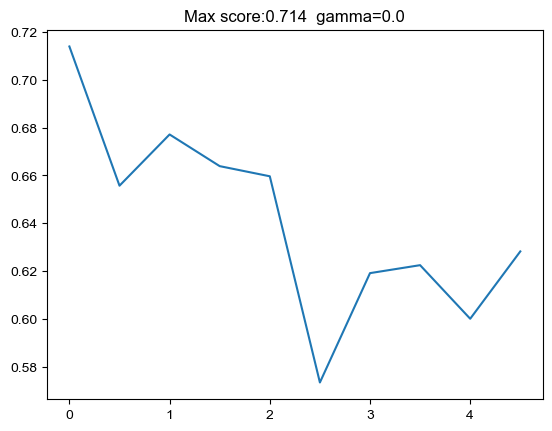

Optimazed Model XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=60, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Best Scores:
accuracy_score             0.687500
balanced_accuracy_score    0.713939
dtype: float64
5. Optimaze Parma: reg_alpha  range:[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 

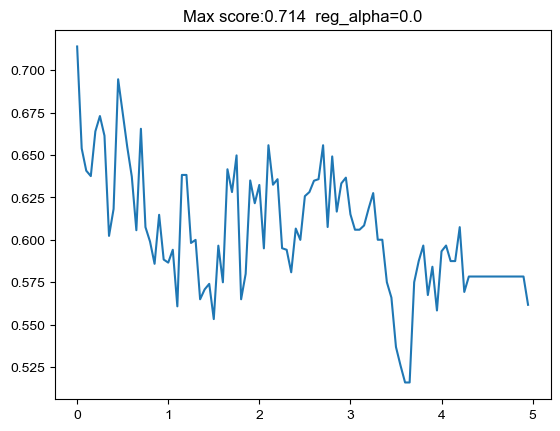

Optimazed Model XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=60, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Best Scores:
accuracy_score             0.687500
balanced_accuracy_score    0.713939
dtype: float64
6. Optimaze Parma: reg_lambda  range:[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95

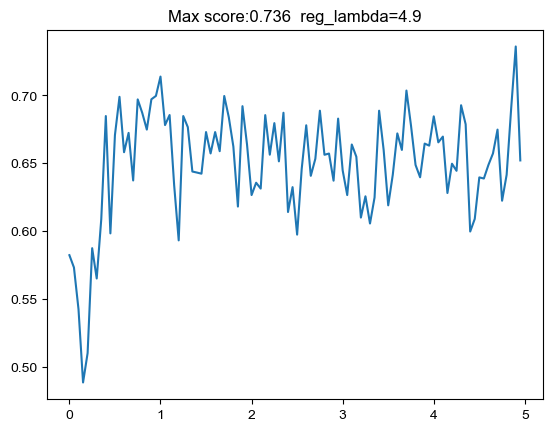

Optimazed Model XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=60, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Best Scores:
accuracy_score             0.725000
balanced_accuracy_score    0.736136
dtype: float64
                           Before     After
accuracy_score           0.687500  0.725000
balanced_accuracy_score  0.713939  0.736136
Best M

In [44]:
# 2 class
parmas = {'n_estimators':range(1,200),
          'learning_rate':np.arange(0.01,0.5,0.01),
          'max_depth':range(1,1000), 
        #   'max_features':range(int(x.shape[1]**0.5),x.shape[1]), 
          'gamma':np.arange(0,5,0.5), 
          'reg_alpha':np.arange(0,5,0.05),
          'reg_lambda':np.arange(0,5,0.05),
          # 'max_samples':list(range(1,60))+[None],
          }

# parmas = {'max_samples':range(1,int(des_train.shape[0]/cv)*cv+des_train.shape[0]%cv-1)}
# neg_mean_squared_error
parma_youhua = MLfunction2.parmaOptimaze(xgbc(use_label_encoder=False, objective="binary:logistic"), [x, y], parmas, random_seed=893, cv=5, scoresFun=[BACC, ACC])

In [58]:


results = MLfunction2.cross_val(xgbc(gamma=0.0, max_depth=5, learning_rate=0.3, n_estimators=60, reg_lambda=4.9), x, y, random_seed=893, scoresFun=[BACC, ACC, F1], cv=5)
results.scores, results.scores.mean()

(   balanced_accuracy_score  accuracy_score  f1_score
 0                 0.763636          0.7500  0.800000
 1                 0.812500          0.8125  0.823529
 2                 0.583333          0.5625  0.533333
 3                 0.854545          0.8750  0.800000
 4                 0.666667          0.6250  0.625000,
 balanced_accuracy_score    0.736136
 accuracy_score             0.725000
 f1_score                   0.716373
 dtype: float64)

Scores Begin:
accuracy_score             0.5
balanced_accuracy_score    0.5
dtype: float64
1. Optimaze Parma: algorithm  range:['ball_tree', 'kd_tree', 'brute']
Original Model KNeighborsClassifier()


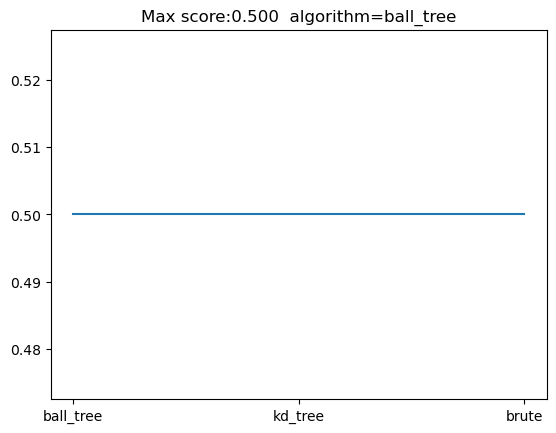

Optimazed Model KNeighborsClassifier(algorithm='ball_tree')
Best Scores:
accuracy_score             0.5
balanced_accuracy_score    0.5
dtype: float64
2. Optimaze Parma: weights  range:['uniform', 'distance']
Original Model KNeighborsClassifier(algorithm='ball_tree')


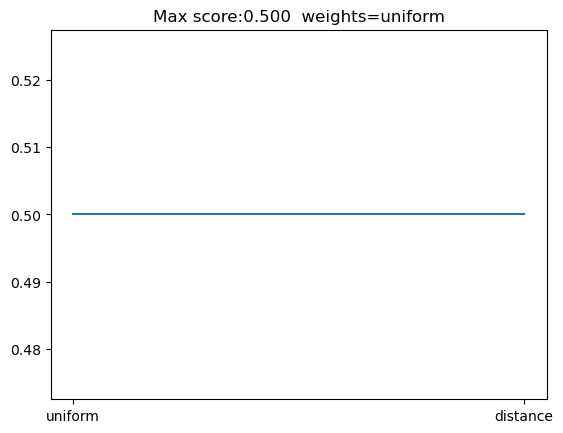

Optimazed Model KNeighborsClassifier(algorithm='ball_tree')
Best Scores:
accuracy_score             0.5
balanced_accuracy_score    0.5
dtype: float64
3. Optimaze Parma: n_neighbors  range:range(1, 50)
Original Model KNeighborsClassifier(algorithm='ball_tree')


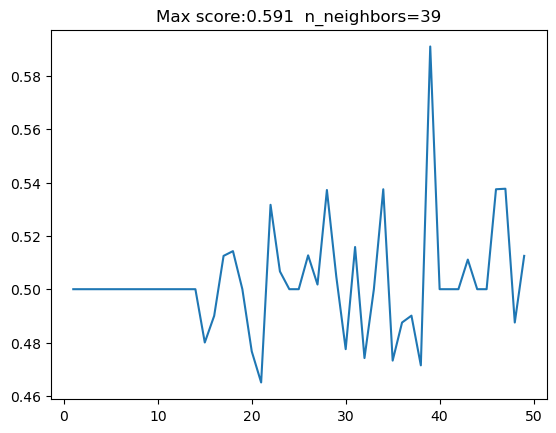

Optimazed Model KNeighborsClassifier(algorithm='ball_tree', n_neighbors=39)
Best Scores:
accuracy_score             0.587500
balanced_accuracy_score    0.591071
dtype: float64
4. Optimaze Parma: p  range:[1, 2]
Original Model KNeighborsClassifier(algorithm='ball_tree', n_neighbors=39)


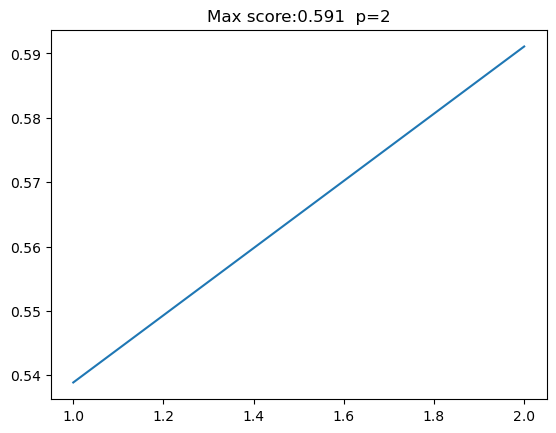

Optimazed Model KNeighborsClassifier(algorithm='ball_tree', n_neighbors=39)
Best Scores:
accuracy_score             0.587500
balanced_accuracy_score    0.591071
dtype: float64
5. Optimaze Parma: leaf_size  range:range(1, 100)
Original Model KNeighborsClassifier(algorithm='ball_tree', n_neighbors=39)


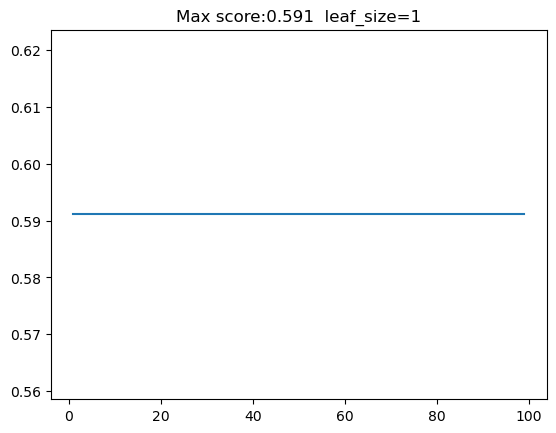

Optimazed Model KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, n_neighbors=39)
Best Scores:
accuracy_score             0.587500
balanced_accuracy_score    0.591071
dtype: float64
                         Before     After
accuracy_score              0.5  0.587500
balanced_accuracy_score     0.5  0.591071
Best Model for test: KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, n_neighbors=39)


In [13]:
# 2 class
parmas = {'algorithm':['ball_tree', 'kd_tree', 'brute'],
          'weights':['uniform', 'distance'],
          'n_neighbors':range(1,50),
          'p':[1,2],
          'leaf_size':range(1,100)
          }

parma_youhua = MLfunction2.parmaOptimaze(knnc(), [x, y], parmas, random_seed=240, cv=5, scoresFun=[BACC, ACC])

In [52]:
from sklearn.linear_model import BayesianRidge
knnc_model = knnc(algorithm='ball_tree', leaf_size=1, n_neighbors=39)
results = MLfunction2.cross_val(knnc_model, x, y, random_seed=240, scoresFun=[BACC, ACC, F1], cv=5)
results.scores, results.scores.mean()

(   balanced_accuracy_score  accuracy_score  f1_score
 0                 0.812500          0.8125  0.842105
 1                 0.500000          0.3750  0.545455
 2                 0.500000          0.5000  0.666667
 3                 0.642857          0.6875  0.782609
 4                 0.500000          0.5625  0.720000,
 balanced_accuracy_score    0.591071
 accuracy_score             0.587500
 f1_score                   0.711367
 dtype: float64)

Scores Begin:
accuracy_score             0.4
balanced_accuracy_score    0.5
dtype: float64
1. Optimaze Parma: kernel  range:['rbf', 'poly', 'sigmoid']
Original Model SVC()


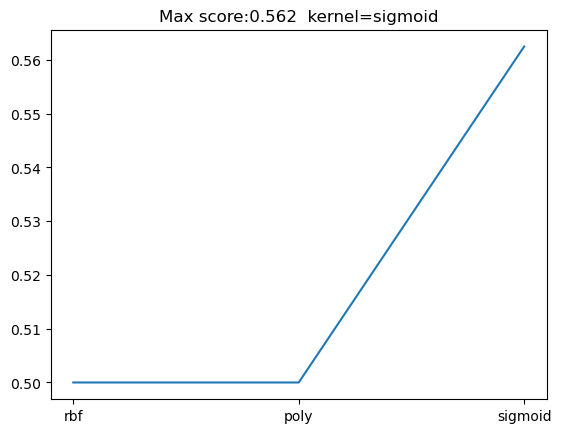

Optimazed Model SVC(kernel='sigmoid')
Best Scores:
accuracy_score             0.4625
balanced_accuracy_score    0.5625
dtype: float64
2. Optimaze Parma: C  range:[ 1.    1.05  1.1   1.15  1.2   1.25  1.3   1.35  1.4   1.45  1.5   1.55
  1.6   1.65  1.7   1.75  1.8   1.85  1.9   1.95  2.    2.05  2.1   2.15
  2.2   2.25  2.3   2.35  2.4   2.45  2.5   2.55  2.6   2.65  2.7   2.75
  2.8   2.85  2.9   2.95  3.    3.05  3.1   3.15  3.2   3.25  3.3   3.35
  3.4   3.45  3.5   3.55  3.6   3.65  3.7   3.75  3.8   3.85  3.9   3.95
  4.    4.05  4.1   4.15  4.2   4.25  4.3   4.35  4.4   4.45  4.5   4.55
  4.6   4.65  4.7   4.75  4.8   4.85  4.9   4.95  5.    5.05  5.1   5.15
  5.2   5.25  5.3   5.35  5.4   5.45  5.5   5.55  5.6   5.65  5.7   5.75
  5.8   5.85  5.9   5.95  6.    6.05  6.1   6.15  6.2   6.25  6.3   6.35
  6.4   6.45  6.5   6.55  6.6   6.65  6.7   6.75  6.8   6.85  6.9   6.95
  7.    7.05  7.1   7.15  7.2   7.25  7.3   7.35  7.4   7.45  7.5   7.55
  7.6   7.65  7.7   7.75  7.8   7.8

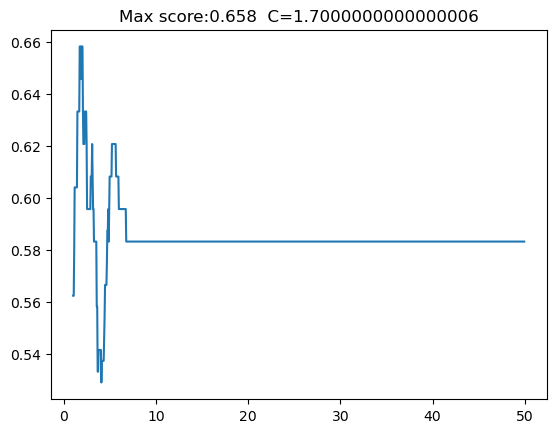

Optimazed Model SVC(C=1.7000000000000006, kernel='sigmoid')
Best Scores:
accuracy_score             0.575000
balanced_accuracy_score    0.658333
dtype: float64
3. Optimaze Parma: gamma  range:[0.0001     0.0001241  0.00014819 0.00017229 0.00019638 0.00022048
 0.00024457 0.00026867 0.00029276 0.00031686 0.00034095 0.00036505
 0.00038915 0.00041324 0.00043734 0.00046143 0.00048553 0.00050962
 0.00053372 0.00055781 0.00058191 0.00060601 0.0006301  0.0006542
 0.00067829 0.00070239 0.00072648 0.00075058 0.00077467 0.00079877
 0.00082286 0.00084696 0.00087106 0.00089515 0.00091925 0.00094334
 0.00096744 0.00099153 0.00101563 0.00103972 0.00106382 0.00108792
 0.00111201 0.00113611 0.0011602  0.0011843  0.00120839 0.00123249
 0.00125658 0.00128068 0.00130477 0.00132887 0.00135297 0.00137706
 0.00140116 0.00142525 0.00144935 0.00147344 0.00149754 0.00152163
 0.00154573 0.00156982 0.00159392 0.00161802 0.00164211 0.00166621
 0.0016903  0.0017144  0.00173849 0.00176259 0.00178668 0.00181078
 0.00

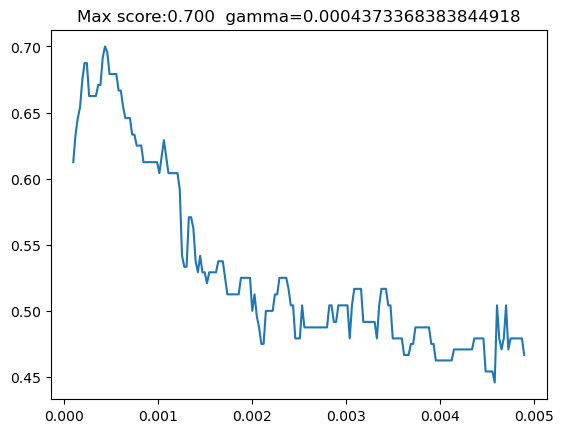

Optimazed Model SVC(C=1.7000000000000006, gamma=0.0004373368383844918, kernel='sigmoid')
Best Scores:
accuracy_score             0.6875
balanced_accuracy_score    0.7000
dtype: float64
                         Before   After
accuracy_score              0.4  0.6875
balanced_accuracy_score     0.5  0.7000
Best Model for test: SVC(C=1.7000000000000006, gamma=0.0004373368383844918, kernel='sigmoid')


In [16]:
# 2 class
parmas = {'kernel':["rbf", "poly", "sigmoid"],
          'C':np.arange(1,50,0.05),
          'gamma':np.linspace(0.0001,100/x.shape[1],200),
          }

parma_youhua = MLfunction2.parmaOptimaze(svc(), [x, y], parmas, random_seed=100, cv=5, scoresFun=[BACC, ACC])

In [59]:
# from sklearn.linear_model import BayesianRidge
svc_model = svc(C=1.7000000000000006, gamma=0.0004373368383844918, kernel='sigmoid',probability=True)
results = MLfunction2.cross_val(svc_model, x, y, random_seed=100, scoresFun=[BACC, ACC, F1], cv=5)
results.scores, results.scores.mean()

(   balanced_accuracy_score  accuracy_score  f1_score
 0                 0.750000          0.7500  0.714286
 1                 0.812500          0.8125  0.823529
 2                 0.500000          0.5000  0.333333
 3                 0.791667          0.8125  0.869565
 4                 0.562500          0.5625  0.631579,
 balanced_accuracy_score    0.683333
 accuracy_score             0.687500
 f1_score                   0.674459
 dtype: float64)